<a href="https://colab.research.google.com/github/LoQiseaking69/Jacobian-calculator/blob/main/Copy_of_JacobianCalculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Evaluated Jacobian matrix at the points: {'x': 1.0, 'y': 1.5707963267948966}
[[ 4.81047738e+00  4.81047738e+00]
 [ 6.12323400e-17 -1.00000000e+00]]


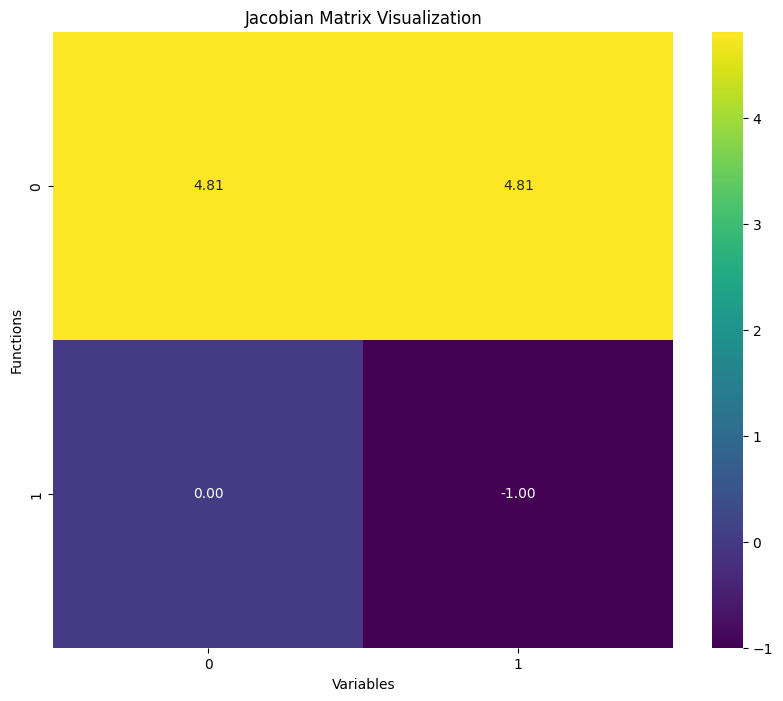

In [ ]:
# Make sure you have all required libraries installed
# !pip install sympy numpy matplotlib seaborn ipywidgets

from sympy import symbols, sympify, lambdify, Matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output

class JacobianComputation:
    def __init__(self, function_expressions, variable_names):
        self.variable_names = variable_names
        self.functions = [sympify(func) for func in function_expressions]
        self.variables = symbols(variable_names)

    def compute_jacobian(self):
        jacobian = Matrix(self.functions).jacobian(self.variables)
        return jacobian

    def evaluate_jacobian(self, variable_values):
        jacobian_func = lambdify(self.variables, self.compute_jacobian(), 'numpy')
        return jacobian_func(*variable_values)

    def plot_jacobian(self, jacobian_matrix):
        plt.figure(figsize=(10, 8))
        sns.heatmap(jacobian_matrix, annot=True, cmap='viridis', fmt='.2f')
        plt.title('Jacobian Matrix Visualization')
        plt.xlabel('Variables')
        plt.ylabel('Functions')
        plt.show()

# Widgets for input
function_input = widgets.Textarea(
    value='x**2 + y**2; exp(x) * sin(y)',
    placeholder='Type functions separated by a semicolon ";"',
    description='Functions:',
    disabled=False,
    layout=widgets.Layout(width='95%', height='100px')
)

variable_input = widgets.Text(
    value='x, y',
    placeholder='Type variables separated by commas',
    description='Variables:',
    disabled=False
)

value_input = widgets.Text(
    value='1, pi/4',
    placeholder='Enter the values for the variables separated by commas',
    description='Values:',
    disabled=False
)

evaluate_button = widgets.Button(
    description='Evaluate Jacobian',
    disabled=False,
    button_style='',
    tooltip='Click to evaluate the Jacobian matrix',
)

output = widgets.Output()

def on_evaluate_button_clicked(b):
    with output:
        try:
            clear_output(wait=True)
            variable_names = variable_input.value.replace(' ', '').split(',')
            function_strings = function_input.value.split(';')
            function_expressions = [sympify(func.strip()) for func in function_strings]
            variable_values = [float(eval(val)) for val in value_input.value.replace(' ', '').split(',')]

            jc = JacobianComputation(function_expressions, variable_names)
            jacobian_matrix = jc.compute_jacobian()

            evaluated_jacobian = jc.evaluate_jacobian(variable_values)
            print("Evaluated Jacobian matrix at the points:", dict(zip(variable_names, variable_values)))
            print(evaluated_jacobian)
            jc.plot_jacobian(evaluated_jacobian)
        except Exception as e:
            print(f"An error occurred: {e}")

# Button click event
evaluate_button.on_click(on_evaluate_button_clicked)

# Display widgets
display(function_input, variable_input, value_input, evaluate_button, output)